# Molecule sets and similarity example

Credits : Andrea Volkamer, iwatobiphen


# Lets start with fingerprint calculation for molecules

In [22]:
from rdkit import Chem
from rdkit import DataStructs
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from rdkit.Chem import AllChem
from rdkit.six import StringIO

In [23]:
mol1 = Chem.MolFromSmiles("Cc1ccccc1")
mol2 = Chem.MolFromSmiles("Clc1ccccc1")

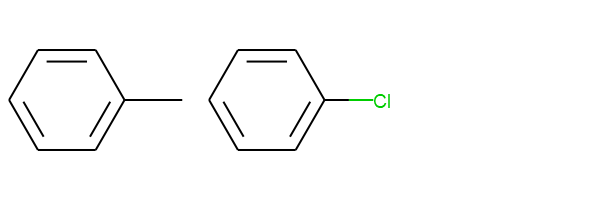

In [24]:
Draw.MolsToGridImage([mol1, mol2])

In [25]:
fp1 = AllChem.GetMorganFingerprint(mol1, 2)
fp2 = AllChem.GetMorganFingerprint(mol2, 2)

In [26]:
DataStructs.TanimotoSimilarity(fp1, fp2)

0.5384615384615384

## Working with Tables and csv Files

In [27]:
import pandas as pd
df = pd.read_csv('./data/EGFR-course.csv', delimiter=',', names=['Smiles', 'Name'], header=None)

In [28]:
df.head()

,Smiles,Name
0,COc1cc2ncnc(Nc3ccc(F)c(Cl)c3)c2cc1OCCCN1CCOCC1,Gefitinib
1,C#Cc1cccc(Nc2ncnc3cc(OCCOC)c(OCCOC)cc23)c1,Erlotinib
2,CS(=O)(=O)CCNCc1ccc(-c2ccc3ncnc(Nc4ccc(OCc5ccc...,Lapatinib
3,CN(C)C/C=C/C(=O)Nc1cc2c(Nc3ccc(F)c(Cl)c3)ncnc2...,Afatinib
4,C=CC(=O)Nc1cc(Nc2nccc(-c3cn(C)c4ccccc34)n2)c(O...,Osimertinib


In [29]:
df.shape

(5, 2)

In [30]:
df.columns

Index(['Smiles', 'Name'], dtype='object')

,Name,ROMol
0,Gefitinib,
1,Erlotinib,
2,Lapatinib,
3,Afatinib,
4,Osimertinib,

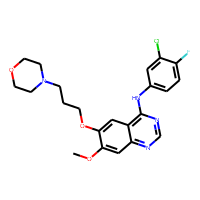
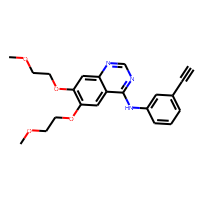
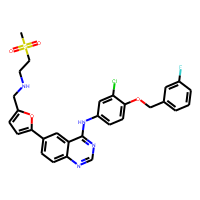
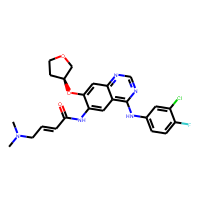
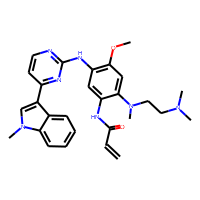

In [31]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw, PandasTools

PandasTools.AddMoleculeColumnToFrame(df, smilesCol='Smiles')

# Draw molecules
df[['Name', 'ROMol']]

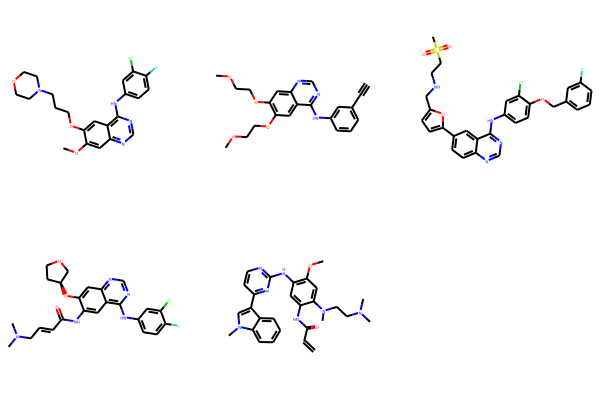

In [32]:
# Or
Draw.MolsToGridImage(list(df.ROMol), useSVG=True)

Add descriptor column to dataframe.

In [35]:
from rdkit.Chem import Descriptors
print (Descriptors.ExactMolWt(mol1))

92.062600256


In [36]:
from rdkit.Chem import Descriptors
df['HeavyAtoms'] = df.apply(lambda x: Descriptors.HeavyAtomCount(Chem.MolFromSmiles(x['Smiles'])), axis=1)

,Smiles,Name,ROMol,HeavyAtoms
0,COc1cc2ncnc(Nc3ccc(F)c(Cl)c3)c2cc1OCCCN1CCOCC1,Gefitinib,,31
1,C#Cc1cccc(Nc2ncnc3cc(OCCOC)c(OCCOC)cc23)c1,Erlotinib,,29
2,CS(=O)(=O)CCNCc1ccc(-c2ccc3ncnc(Nc4ccc(OCc5ccc...,Lapatinib,,40
3,CN(C)C/C=C/C(=O)Nc1cc2c(Nc3ccc(F)c(Cl)c3)ncnc2...,Afatinib,,34
4,C=CC(=O)Nc1cc(Nc2nccc(-c3cn(C)c4ccccc34)n2)c(O...,Osimertinib,,37

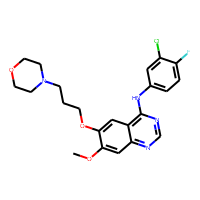
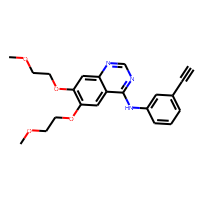
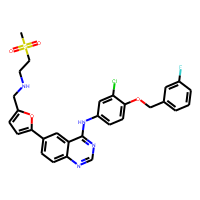
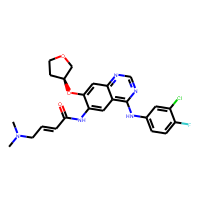
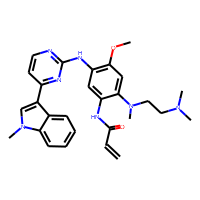

In [37]:
df.head()

## Molecular similarity

Find most similar compound - which one is the most similar one to Gefitinib?

In [38]:
from rdkit.Chem import AllChem

In [44]:
from rdkit.Chem import rdFingerprintGenerator
from rdkit import DataStructs

# Generate fingerprints for the molecules
# By default the RDKit uses Morgan Fingerprints of radius 2 (MFP2)
fps = rdFingerprintGenerator.GetCountFPs(list(df.ROMol))

# Gefitinib as reference
fp3 = fps[0]
 
# Calculate similarity to reference
all_sim = DataStructs.BulkDiceSimilarity(fp3,fps)
df['sim2Gefitinib'] = all_sim          

,Smiles,Name,ROMol,HeavyAtoms,sim2Gefitinib
0,COc1cc2ncnc(Nc3ccc(F)c(Cl)c3)c2cc1OCCCN1CCOCC1,Gefitinib,,31,1.000000
1,C#Cc1cccc(Nc2ncnc3cc(OCCOC)c(OCCOC)cc23)c1,Erlotinib,,29,0.609195
2,CS(=O)(=O)CCNCc1ccc(-c2ccc3ncnc(Nc4ccc(OCc5ccc...,Lapatinib,,40,0.517073
3,CN(C)C/C=C/C(=O)Nc1cc2c(Nc3ccc(F)c(Cl)c3)ncnc2...,Afatinib,,34,0.641711
4,C=CC(=O)Nc1cc(Nc2nccc(-c3cn(C)c4ccccc34)n2)c(O...,Osimertinib,,37,0.371134

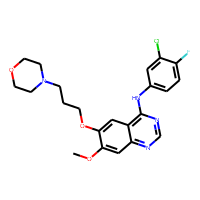
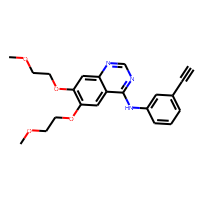
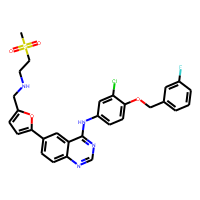
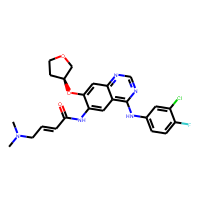
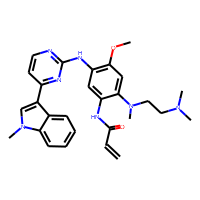

In [45]:
df.head()

In [46]:
df.sort_values(['sim2Gefitinib'], inplace=True, ascending=False)

,Smiles,Name,ROMol,HeavyAtoms,sim2Gefitinib
0,COc1cc2ncnc(Nc3ccc(F)c(Cl)c3)c2cc1OCCCN1CCOCC1,Gefitinib,,31,1.000000
3,CN(C)C/C=C/C(=O)Nc1cc2c(Nc3ccc(F)c(Cl)c3)ncnc2...,Afatinib,,34,0.641711
1,C#Cc1cccc(Nc2ncnc3cc(OCCOC)c(OCCOC)cc23)c1,Erlotinib,,29,0.609195
2,CS(=O)(=O)CCNCc1ccc(-c2ccc3ncnc(Nc4ccc(OCc5ccc...,Lapatinib,,40,0.517073
4,C=CC(=O)Nc1cc(Nc2nccc(-c3cn(C)c4ccccc34)n2)c(O...,Osimertinib,,37,0.371134

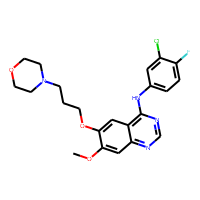
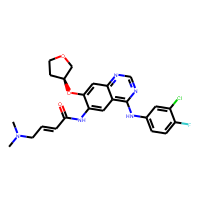
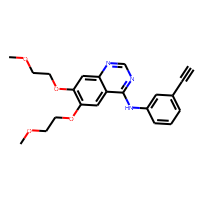
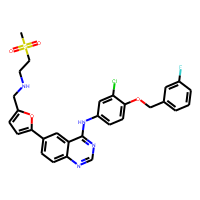
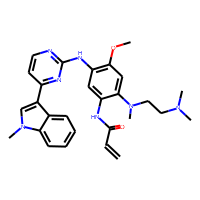

In [47]:
df.head()

In [48]:
# Save file
df.drop('ROMol', axis=1).to_csv('./data/mytest_csvFile.csv')